Name: Atharva Patil

B01014288

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [ ]:
#Read and Load the dataset
def load_dataset(filename):
    with open(filename) as dataset_file:
        features_list = []
        labels_list = []
        dataset_lines = dataset_file.readlines()
        for data_line in dataset_lines:
            elements = data_line.strip().split(' ')
            label = int(float(elements[0]))
            labels_list.append(label)
            feature_values = [float(value) for value in elements[1:]]
            features_list.append(feature_values)
        features = np.array(features_list)
        targets = np.array(labels_list)
        targets = targets.reshape((targets.shape[0], 1))
        print(f'Features shape: {features.shape}')
        print(f'Targets shape: {targets.shape}')
        return features, targets

In [ ]:
def mapDigitsToIndices(labels):
    totalEntries = labels.shape[0]
    indexMap = {}
    for index in range(totalEntries):
        currentLabel = labels[index, 0]
        if currentLabel not in indexMap:
            indexMap[currentLabel] = []
        indexMap[currentLabel].append(index)
    return indexMap

In [ ]:
# Feature Selection

def calculateAverageIntensity(pixelData):
    numSamples, numPixels = pixelData.shape
    avgIntensities = np.mean(pixelData, axis=1, keepdims=True)
    return avgIntensities

def calculateImageSymmetry(pixelData):
    numSamples, numPixels = pixelData.shape
    reshapedImages = [pixelData[i, :].reshape((16, 16)) for i in range(numSamples)]
    flippedImages = [np.flip(reshapedImages[i], axis=1) for i in range(numSamples)]
    reshapedImages = np.array(reshapedImages)
    flippedImages = np.array(flippedImages)
    mseDifferences = np.mean(np.square(reshapedImages - flippedImages), axis=(1, 2))
    imageSymmetries = 1 / (1 + mseDifferences)
    return imageSymmetries.reshape(numSamples, 1)

def createAugmentedFeatureMatrix(pixelData):
    avgIntensity = calculateAverageIntensity(pixelData)
    imgSymmetry = calculateImageSymmetry(pixelData)
    biasColumn = np.ones((pixelData.shape[0], 1))
    return np.concatenate((biasColumn, avgIntensity, imgSymmetry), axis=1)

In [ ]:
# Data loading and preprocessing
train_features, train_labels = load_dataset('ZipDigits.train')
test_features, test_labels = load_dataset('ZipDigits.test')
train_indices = mapDigitsToIndices(train_labels)
test_indices = mapDigitsToIndices(test_labels)
augmented_train_features = createAugmentedFeatureMatrix(train_features)
augmented_test_features = createAugmentedFeatureMatrix(test_features)
train_data = augmented_train_features[np.concatenate([train_indices[1], train_indices[5]]), :]
train_target = np.concatenate((np.ones(len(train_indices[1])), -1 * np.ones(len(train_indices[5]))))
test_data = augmented_test_features[np.concatenate([test_indices[1], test_indices[5]]), :]
test_target = np.concatenate((np.ones(len(test_indices[1])), -1 * np.ones(len(test_indices[5]))))

Features shape: (7291, 256)
Targets shape: (7291, 1)
Features shape: (2007, 256)
Targets shape: (2007, 1)


# **Q-1: Support Vector Machines**

In [ ]:
from sklearn.svm import SVC

In [ ]:
# Setup the SVM model and parameter grid for C
param_grid = {'C': np.logspace(-3, 3, 7)}  # Range for C from 0.001 to 1000
model = LinearSVC(dual=False, max_iter=10000)  # Set dual=False for n_samples > n_features
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(train_data, train_target)

GridSearchCV(cv=5, estimator=LinearSVC(dual=False, max_iter=10000),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])},
             scoring='accuracy')

In [ ]:
# Best model and CV score
best_model = grid_search.best_estimator_
best_cv_score = grid_search.best_score_
print("Best C:", best_model.C)
print("Best Cross Validation Score (ECV):", best_cv_score)

Best C: 1.0
Best Cross Validation Score (ECV): 0.9769374129597772


In [ ]:
# Evaluate on training data
train_predictions = best_model.predict(train_data)
ein = 1 - accuracy_score(train_target, train_predictions)
print("(Ein) In-sample error:", ein)

(Ein) In-sample error: 0.023062139654067892


In [ ]:
# Evaluate on test data
test_predictions = best_model.predict(test_data)
etest = 1 - accuracy_score(test_target, test_predictions)
print("(Etest) Test error:", etest)

(Etest) Test error: 0.04481132075471694


In [ ]:
train_features, train_labels = load_dataset('ZipDigits.train')
test_features, test_labels = load_dataset('ZipDigits.test')

# Adjust labels: +1 for digit 1, -1 for others
train_labels = np.where(train_labels == 1, 1, -1)
test_labels = np.where(test_labels == 1, 1, -1)

# Combine data
Xcombined = np.concatenate((train_features, test_features), axis=0)
ycombined = np.concatenate((train_labels, test_labels), axis=0)

print(f'Combined feature matrix shape: {Xcombined.shape}')
print(f'Combined label vector shape: {ycombined.shape}')

Features shape: (7291, 256)
Targets shape: (7291, 1)
Features shape: (2007, 256)
Targets shape: (2007, 1)
Combined feature matrix shape: (9298, 256)
Combined label vector shape: (9298, 1)


In [ ]:
print("Number of '1' labels in ycombined:", np.sum(ycombined == 1))
print("Number of 'Not 1' labels in ycombined:", np.sum(ycombined == -1))

Number of '1' labels in ycombined: 1269
Number of 'Not 1' labels in ycombined: 8029


In [ ]:
# Feature Selection

def calculateAverageIntensity(pixelData):

    print('Calculating average intensity feature')
    numSamples, numPixels = pixelData.shape
    print(f'Input dimensions {numSamples}, {numPixels}')

    # Compute the average intensity for each image
    avgIntensities = np.mean(pixelData, axis=1, keepdims=True)

    print(f'Output dimensions {avgIntensities.shape}')
    return avgIntensities

def calculateImageSymmetry(pixelData):

    print('Calculating symmetry feature')
    numSamples, numPixels = pixelData.shape
    print(f'Input dimensions {numSamples}, {numPixels}')
    reshapedImages = [pixelData[i, :].reshape((16, 16)) for i in range(numSamples)]
    flippedImages = [np.flip(reshapedImages[i], axis=1) for i in range(numSamples)]

    reshapedImages = np.array(reshapedImages)
    flippedImages = np.array(flippedImages)

    # Compute symmetry by mean squared error between image and its horizontal flip
    mseDifferences = np.mean(np.square(reshapedImages - flippedImages), axis=(1, 2))
    imageSymmetries = 1 / (1 + mseDifferences)

    imageSymmetries = imageSymmetries.reshape(numSamples, 1)
    print(f'Output dimensions {imageSymmetries.shape}')
    return imageSymmetries

def createAugmentedFeatureMatrix(pixelData):

    numSamples, _ = pixelData.shape
    avgIntensity = calculateAverageIntensity(pixelData)
    imgSymmetry = calculateImageSymmetry(pixelData)
    biasColumn = np.ones((numSamples, 1))
    augmentedFeatures = np.concatenate((biasColumn, avgIntensity, imgSymmetry), axis=1)
    print(augmentedFeatures)
    print(f'Dimensions of augmented feature matrix: {augmentedFeatures.shape}')
    return augmentedFeatures

In [ ]:
print('Creating augmented feature matrix for training data')

augmentedTrainFeatures = createAugmentedFeatureMatrix(Xcombined)
numAugmentedTrain, featureDimension = augmentedTrainFeatures.shape

Creating augmented feature matrix for training data
Calculating average intensity feature
Input dimensions 9298, 256
Output dimensions (9298, 1)
Calculating symmetry feature
Input dimensions 9298, 256
Output dimensions (9298, 1)
[[ 1.         -0.31781641  0.66843001]
 [ 1.         -0.11173828  0.59007206]
 [ 1.         -0.53799609  0.61461237]
 ...
 [ 1.         -0.38228516  0.48940933]
 [ 1.          0.01994141  0.71588486]
 [ 1.         -0.62204687  0.86770629]]
Dimensions of augmented feature matrix: (9298, 3)


In [ ]:
# Normalize features

def normalizeFeatures(features):
    # Exclude the bias column from normalization
    featuresWithoutBias = features[:, 1:]

    minVals = featuresWithoutBias.min(axis=0)
    maxVals = featuresWithoutBias.max(axis=0)
    rangeVals = maxVals - minVals

    # Normalize to [0, 1], then scale to [-1, 1]
    normalizedFeaturesWithoutBias = ((featuresWithoutBias - minVals) / rangeVals) * 2 - 1

    # Re-add the bias column after normalization
    normalizedFeatures = np.concatenate([features[:, :1], normalizedFeaturesWithoutBias], axis=1)
    return normalizedFeatures

# Apply normalization to the augmented feature matrix
normalizedTrainFeatures = normalizeFeatures(augmentedTrainFeatures)

In [ ]:
# Create Dataset

def createDatasets(features, labels, num_samples=300):
    # Find the indices for each class
    plus1s_indices = np.where(labels == 1)[0]
    minus1s_indices = np.where(labels == -1)[0]

    # Shuffle the indices for each class
    np.random.shuffle(plus1s_indices)
    np.random.shuffle(minus1s_indices)

    # Determine the number of samples to take from each class
    num_plus1s = int(num_samples * len(plus1s_indices) / len(labels))
    num_minus1s = num_samples - num_plus1s

    # Select the indices for the training set from each class
    train_indices = np.concatenate((plus1s_indices[:num_plus1s], minus1s_indices[:num_minus1s]))
    np.random.shuffle(train_indices)

    # The remaining indices form the test set
    test_indices = np.concatenate((plus1s_indices[num_plus1s:], minus1s_indices[num_minus1s:]))

    # Split the features and labels into training and test sets using the selected indices
    D_features = features[train_indices, :]
    D_labels = labels[train_indices]
    Dtest_features = features[test_indices, :]
    Dtest_labels = labels[test_indices]

    return D_features, D_labels, Dtest_features, Dtest_labels

D_features, D_labels, Dtest_features, Dtest_labels = createDatasets(normalizedTrainFeatures, ycombined.flatten())
print("Number of '1' labels in D_labels:", np.sum(D_labels == 1))
print("Number of 'Not 1' labels in D_labels:", np.sum(D_labels == -1))

Number of '1' labels in D_labels: 40
Number of 'Not 1' labels in D_labels: 260


# **Q-2: Support Vector Machines with Polynomial Kernel**

In [ ]:
# Flatten the labels for scikit-learn compatibility
D_labels_flat = D_labels.ravel()
Dtest_labels_flat = Dtest_labels.ravel()

In [ ]:
# Setup the SVM with polynomial kernel and perform GridSearchCV
param_grid = {
    'C': np.logspace(-3, 2, 6),  # Range for C
    'degree': [10],  # Polynomial degree
    'coef0': np.linspace(0, 1, 5)  # Polynomial coefficient
}
model = SVC(kernel='poly')
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(D_features, D_labels_flat)

GridSearchCV(cv=5, estimator=SVC(kernel='poly'),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'coef0': array([0.  , 0.25, 0.5 , 0.75, 1.  ]),
                         'degree': [10]},
             scoring='accuracy')

In [ ]:
# Extract the best estimator and its parameters
best_svm = grid_search.best_estimator_
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation accuracy:", grid_search.best_score_)

Best parameters: {'C': 0.001, 'coef0': 1.0, 'degree': 10}
Best cross-validation accuracy: 0.97


In [ ]:
# Evaluate on training data
train_predictions = best_svm.predict(D_features)
ein = 1 - accuracy_score(D_labels_flat, train_predictions)
print("(Ein) In-sample error:", ein)

(Ein) In-sample error: 0.030000000000000027


In [ ]:
# Evaluate on test data
test_predictions = best_svm.predict(Dtest_features)
etest = 1 - accuracy_score(Dtest_labels_flat, test_predictions)
print("(Etest) Test error:", etest)

(Etest) Test error: 0.03789731051344747


# **Q-3: The k-NN Rule**

In [ ]:
import numpy as np
from numpy.linalg import norm
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# Prepare the data (assuming D_features and D_labels have already been created with 300 random samples)
X = D_features
y = D_labels_flat  # Make sure the labels are a flat array for scikit-learn

In [ ]:
# Define a range of k values to test
k_values = range(1, 20)
cross_val_scores = []

# Perform cross-validation for each value of k
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    # Perform 5-fold cross-validation and store the mean accuracy
    scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')
    cross_val_scores.append(1 - np.mean(scores))  # Store 1 - accuracy to represent error rate

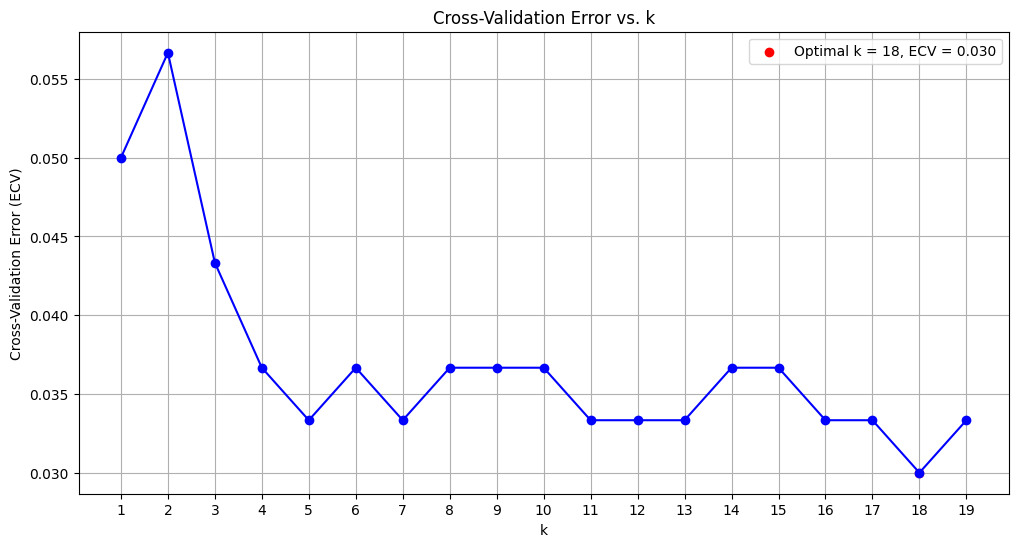

The optimal value of k is 18 with a cross-validation error of 0.030


In [ ]:
# Plot ECV versus k
plt.figure(figsize=(12, 6))
plt.plot(k_values, cross_val_scores, marker='o', linestyle='-', color='blue')
plt.title('Cross-Validation Error vs. k')
plt.xlabel('k')
plt.ylabel('Cross-Validation Error (ECV)')
plt.xticks(list(k_values))
plt.grid(True)

# Indicate the k with the lowest cross-validation error
optimal_k = k_values[np.argmin(cross_val_scores)]
min_ecv = min(cross_val_scores)
plt.scatter(optimal_k, min_ecv, color='red', label=f'Optimal k = {optimal_k}, ECV = {min_ecv:.3f}')
plt.legend()

# Show the plot
plt.show()

print(f"The optimal value of k is {optimal_k} with a cross-validation error of {min_ecv:.3f}")

Ein for k=3: 0.027
ECV for k=3: 0.043


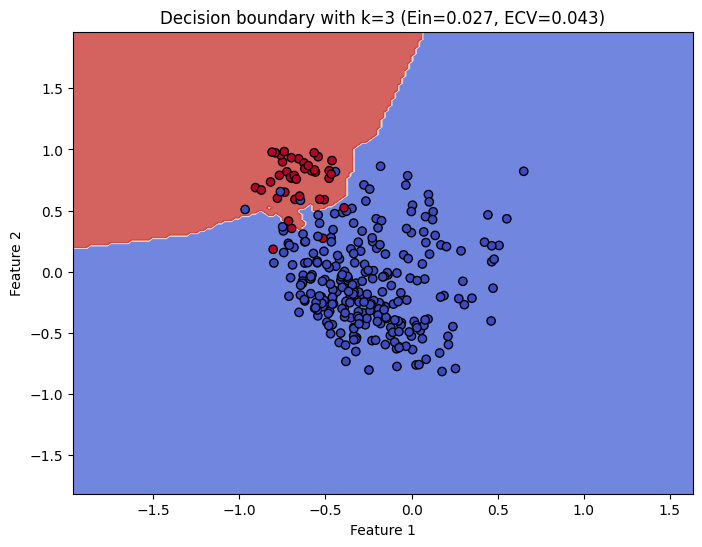

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

k = 3

# Create and train the k-NN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=k)
knn_classifier.fit(X, y)

# Compute in-sample error (Ein)
y_pred_train = knn_classifier.predict(X)
Ein = 1 - accuracy_score(y, y_pred_train)

# Recompute the cross-validation error (ECV) for the chosen k
scores = cross_val_score(knn_classifier, X, y, cv=5, scoring='accuracy')
ECV = 1 - np.mean(scores)

# Print the errors
print(f'Ein for k={k}: {Ein:.3f}')
print(f'ECV for k={k}: {ECV:.3f}')

# Plot the decision boundary
# First we need to create a mesh to plot in
# Create a mesh to plot in
h = .02  # step size in the mesh
x_min, x_max = X[:, 1].min() - 1, X[:, 1].max() + 1
y_min, y_max = X[:, 2].min() - 1, X[:, 2].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predict class for each point in the mesh. Here we add a bias term of 1 for each example in the mesh grid
mesh_data = np.c_[np.ones(xx.ravel().shape[0]), xx.ravel(), yy.ravel()]
Z = knn_classifier.predict(mesh_data)

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

# Plot also the training points
plt.scatter(X[:, 1], X[:, 2], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title(f"Decision boundary with k={k} (Ein={Ein:.3f}, ECV={ECV:.3f})")

plt.show()

In [ ]:
# Predict on the test data
y_pred_test = knn_classifier.predict(Dtest_features)

# Compute the test error (Etest)
Etest = 1 - accuracy_score(Dtest_labels_flat, y_pred_test)

print(f'Etest for k={k}: {Etest:.3f}')

Etest for k=3: 0.036
